## Confusion Matrix of Iris Dataset using k-NN

분류 모델의 성능을 측정하기 위한 confusion matrix

실제 타겟의 값을 분류 모델을 통해 예측한 값과 비교

Confusion matrix를 통해 분류 모델의 성능을 확인할 수 있으며, 어떤 종류의 오류가 발생하는지 확인 가능

<span style="color: #2D3748; background-color:#fff5b1;">Test size 0.2로 10번 반복 실험한 결과 setosa에 대한 분류는 잘 하지만 versicolor와 virginica를 잘못 분류하는 경우가 발생하였다.</span>

<span style="color: #2D3748; background-color:#fff5b1;">반복 실험 동안 계속 잘 못 분류되는 데이터를 분석한 결과 virginica label을 가진 데이터가 versicolor 데이터 특징과 거의 동일하기 때문에 분류하지 못하였다.</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
iris = load_iris()

features = iris.data
target = iris.target
target_names = iris.target_names

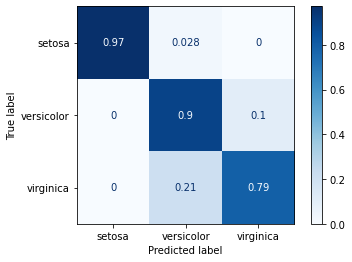

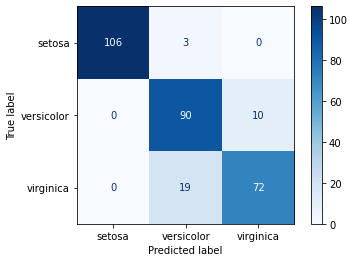

In [3]:
from collections import Counter

max_seed = 10

predict_list = []
label_list = []
error_value = []
error_seed = []
error = []
error_list = []

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train.T)}, n_jobs=-1)
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    equal = np.equal(predict, y_test)
    idx = np.where(equal == False)
    if len(idx[0]) != 0:
        for idx in idx[0]:
            values = x_test[idx]
            values_seed = np.append(values, seed)
            values = np.append(values, y_test[idx])
            error_value.append(values)
            error_seed.append(values_seed)

error_value = np.array(error_value)
counter = Counter(map(tuple, error_value.tolist()))

max_list = list(counter.values())
max_count = np.max(max_list)

for key, value in counter.items():
    if value == max_count:
        error.append(key)

error_seed = np.array(error_seed)
error = np.array(error)

for idx, e_list in enumerate(error):
    for s_idx, seed_list in enumerate(error_seed):
        error_equal = np.array_equal(seed_list[:4], e_list[:4])
        if error_equal:
            add_seed = np.append(error[idx], seed_list[-1])
            error_list.append(add_seed)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

In [4]:
k = 3

for e in error_list:
    dist_arr = []
    print("Seed : ", int(e[-1]))
    print("Error data value : ", e[:4], " / label : ", int(e[-2]))

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=int(e[-1]), shuffle=True)
    knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train.T)}, n_jobs=-1)
    knn.fit(x_train, y_train)
    
    dist_list, index_list = knn.kneighbors(np.array(e[:4]).reshape(1, -1), k)

    for s, index in enumerate(index_list[0]):
        print(s+1, "th close distance value : ", x_train[index], " / label : ", y_train[index], " / distance : ", dist_list[0][s])
    print("-----" * 11)

Seed :  0
Error data value :  [6.1 2.6 5.6 1.4]  / label :  2
1 th close distance value :  [5.7 2.8 4.5 1.3]  / label :  1  / distance :  2.078405125640895
2 th close distance value :  [5.8 2.7 4.1 1. ]  / label :  1  / distance :  2.1692371355329776
3 th close distance value :  [6.3 2.9 5.6 1.8]  / label :  2  / distance :  2.2328137776629995
-------------------------------------------------------
Seed :  3
Error data value :  [6.1 2.6 5.6 1.4]  / label :  2
1 th close distance value :  [6.1 2.8 4.7 1.2]  / label :  1  / distance :  1.7387232343436776
2 th close distance value :  [5.5 2.6 4.4 1.2]  / label :  1  / distance :  1.7972729127911122
3 th close distance value :  [5.7 2.8 4.5 1.3]  / label :  1  / distance :  2.0440846980654137
-------------------------------------------------------
Seed :  5
Error data value :  [6.1 2.6 5.6 1.4]  / label :  2
1 th close distance value :  [6.1 2.8 4.7 1.2]  / label :  1  / distance :  1.6466083284061295
2 th close distance value :  [5.5 2.6 